In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary

In [ ]:
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.2/955.2 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.9 MB/s eta 0:00:00


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [ ]:
!pip install comet_ml > /dev/null 2>&1
import comet_ml
COMET_API_KEY = "QQO3GXez2hyCau6Hzmzb3LAoK"

assert torch.cuda.is_available(), "Please enable GPU from runtime settings"
assert COMET_API_KEY != "", "Please insert your Comet API Key"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
comet_ml.init(project_name="lab2_part1_NN")
comet_model_1 = comet_ml.Experiment()

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, keras, tensorflow, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/listarova-aleksandra/6s191-lab2-part1-nn/731739e557984c66b490ad59495fb91d



In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 500kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 15.2MB/s]


In [ ]:
image, label = train_dataset[0]
print(image.size())
print(label)

torch.Size([1, 28, 28])
5


{'web': 'https://www.comet.com/api/image/download?imageId=003949927fe347c2938fde77df7d14cb&experimentKey=731739e557984c66b490ad59495fb91d',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=003949927fe347c2938fde77df7d14cb&experimentKey=731739e557984c66b490ad59495fb91d',
 'imageId': '003949927fe347c2938fde77df7d14cb'}

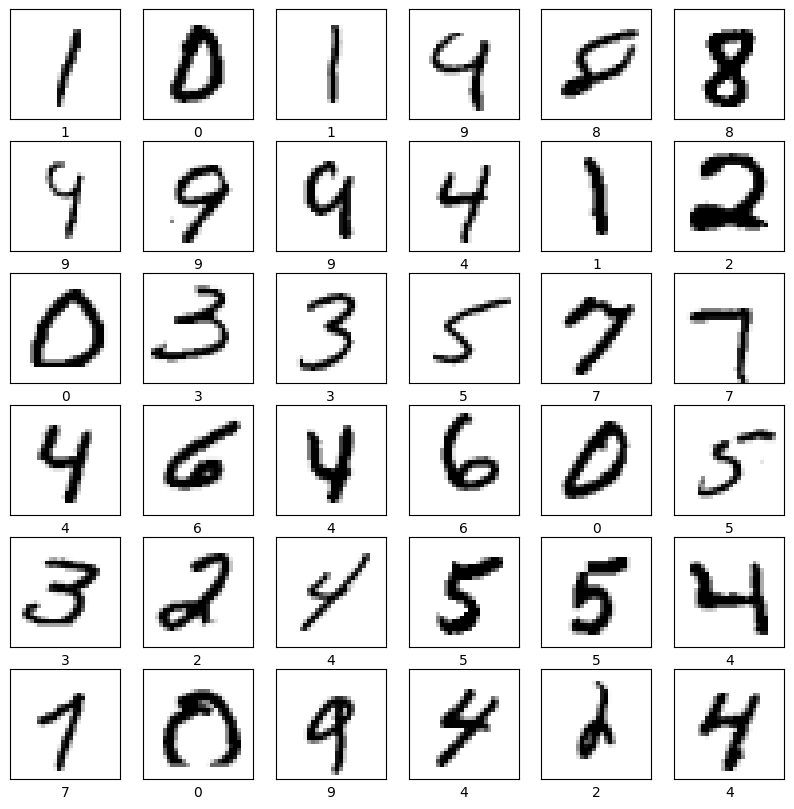

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    image, label = train_dataset[image_ind]
    plt.imshow(image.squeeze(), cmap=plt.cm.binary)
    plt.xlabel(label)
comet_model_1.log_figure(figure=plt)

In [ ]:
def build_fc_model():
    fc_model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 128),
        nn.Linear(128, 10)
        )
    return fc_model

fc_model_sequential = build_fc_model()

In [ ]:
class FullyConnectedModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)

        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

fc_model = FullyConnectedModel().to(device)

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(fc_model.parameters(), lr=0.01)

In [ ]:
BATCH_SIZE = 64
trainset_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
testset_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
def train(model, dataloader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct_pred = 0
        total_pred = 0

        for images, labels in trainset_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = fc_model(images)

            optimizer.zero_grad()
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()*images.size(0)

            predicted = torch.argmax(outputs, dim=1)
            correct_pred += (predicted == labels).sum().item()
            total_pred += labels.size(0)

        total_epoch_loss = total_loss / total_pred
        epoch_accuracy = correct_pred / total_pred
        print(f"Epoch {epoch + 1}, Loss: {total_epoch_loss}, Accuracy: {epoch_accuracy:.4f}")

In [ ]:
EPOCHS = 5
train(fc_model, trainset_loader, loss_function, optimizer, EPOCHS)

comet_model_1.end()

Epoch 1, Loss: 1.263693072573344, Accuracy: 0.7353
Epoch 2, Loss: 0.5023240320046742, Accuracy: 0.8728
Epoch 3, Loss: 0.39597492016156516, Accuracy: 0.8923
Epoch 4, Loss: 0.3537295923868815, Accuracy: 0.9015
Epoch 5, Loss: 0.3282233368118604, Accuracy: 0.9076


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : ancient_sole_788
COMET INFO:     url                   : https://www.comet.com/listarova-aleksandra/6s191-lab2-part1-nn/731739e557984c66b490ad59495fb91d
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1UOLAaUAFn0kg-C8gojbNulp9VQrulzk0
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically,

In [ ]:
def evaluate(model, dataloader, loss_function):
    model.eval()
    test_loss = 0
    correct_pred = 0
    total_pred = 0

    with torch.no_grad():
        for images, labels in testset_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = fc_model(images)

            loss = loss_function(outputs, labels)

            test_loss += loss.item() * images.size(0)

            predicted = torch.argmax(outputs, dim=1)
            correct_pred += (predicted == labels).sum().item()
            total_pred += labels.size(0)

    test_loss /= total_pred
    test_acc = correct_pred / total_pred
    return test_loss, test_acc

test_loss, test_acc = evaluate(fc_model, testset_loader, loss_function)

print('Test accuracy:', test_acc)

Test accuracy: 0.9141


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels = 24, kernel_size=3)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=24, out_channels=36, kernel_size=3)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(36 * 5 * 5, 128)
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

cnn_model = CNN().to(device)
image, label = train_dataset[0]
image = image.to(device).unsqueeze(0)
output = cnn_model(image)
print(cnn_model)

CNN(
  (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(24, 36, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=900, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
cnn_model = CNN().to(device)

batch_size = 64
epochs = 7
optimizer = optim.SGD(cnn_model.parameters(), lr=1e-2)

loss_function = nn.CrossEntropyLoss()

trainset_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testset_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

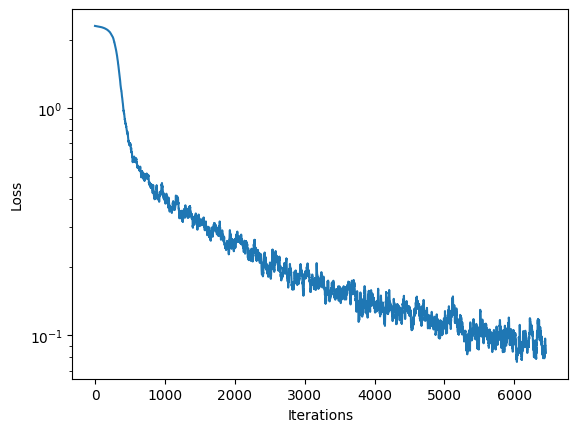

100%|██████████| 938/938 [00:09<00:00, 94.10it/s]


Epoch 7, Loss: 0.0, Accuracy: 0.9709


{'web': 'https://www.comet.com/api/image/download?imageId=9e202bff12974004a8564c2f7884cc2d&experimentKey=c326143dbb6d419ca0469c26519d2b5a',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=9e202bff12974004a8564c2f7884cc2d&experimentKey=c326143dbb6d419ca0469c26519d2b5a',
 'imageId': '9e202bff12974004a8564c2f7884cc2d'}

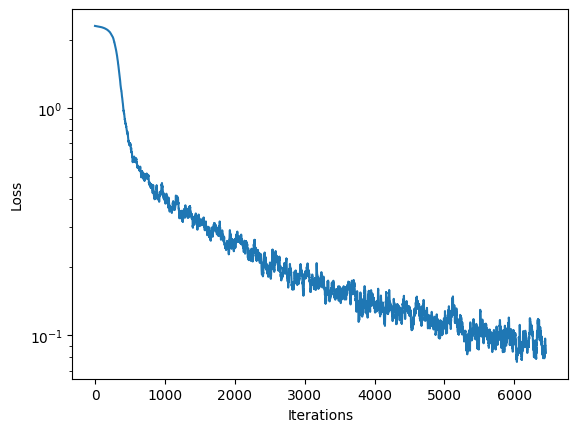

In [ ]:
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')

comet_ml.init(project_name="lab2_part1_CNN")
comet_model_2 = comet_ml.Experiment()

if hasattr(tqdm, '_instances'): tqdm._instances.clear()

cnn_model.train()

for epoch in range(epochs):
    total_loss = 0
    correct_pred = 0
    total_pred = 0

    for idx, (images, labels) in enumerate(tqdm(trainset_loader)):
        images, labels = images.to(device), labels.to(device)

        logits = cnn_model(images)

        loss = loss_function(logits, labels)

        loss_value = loss.item()
        comet_model_2.log_metric("loss", loss_value, step=idx)
        loss_history.append(loss_value)
        plotter.plot(loss_history.get())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predicted = torch.argmax(logits, dim=1)
        correct_pred += (predicted == labels).sum().item()
        total_pred += labels.size(0)

    total_epoch_loss = total_loss / total_pred
    epoch_accuracy = correct_pred / total_pred
    print(f"Epoch {epoch + 1}, Loss: {total_epoch_loss}, Accuracy: {epoch_accuracy:.4f}")

comet_model_2.log_figure(figure=plt)

In [ ]:
test_loss, test_acc = evaluate(cnn_model, trainset_loader, loss_function)

print('Test accuracy:', test_acc)

Test accuracy: 0.9141


In [ ]:
test_image, test_label = test_dataset[0]
test_image = test_image.to(device).unsqueeze(0)

cnn_model.eval()
predictions_test_image = cnn_model(test_image)

In [ ]:
print(predictions_test_image)

tensor([[  0.4648,  -2.4751,   4.5053,   4.9444,  -7.0714,  -0.5678, -10.4544,
          13.8920,  -2.4231,   2.4805]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [ ]:
predictions_value = predictions_test_image.cpu().detach().numpy()
prediction =  np.argmax(predictions_value)
print(prediction)

7


Label of this digit is: 7


{'web': 'https://www.comet.com/api/image/download?imageId=99530e8cc5504421b9219a9f36413840&experimentKey=c326143dbb6d419ca0469c26519d2b5a',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=99530e8cc5504421b9219a9f36413840&experimentKey=c326143dbb6d419ca0469c26519d2b5a',
 'imageId': '99530e8cc5504421b9219a9f36413840'}

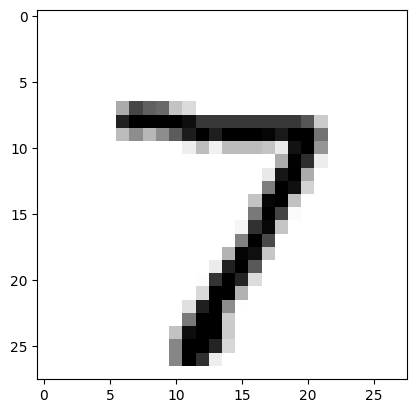

In [ ]:
print("Label of this digit is:", test_label)
plt.imshow(test_image[0,0,:,:].cpu(), cmap=plt.cm.binary)
comet_model_2.log_figure(figure=plt)

In [ ]:
all_predictions = []
all_labels = []
all_images = []

with torch.no_grad():
    for images, labels in testset_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = cnn_model(images)

        probabilities = torch.nn.functional.softmax(outputs, dim=1)

        predicted = torch.argmax(probabilities, dim=1)

        all_predictions.append(probabilities)
        all_labels.append(labels)
        all_images.append(images)


all_predictions = torch.cat(all_predictions)
all_labels = torch.cat(all_labels)
all_images = torch.cat(all_images)

predictions = all_predictions.cpu().numpy()
test_labels = all_labels.cpu().numpy()
test_images = all_images.cpu().numpy()


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : cold_barracuda_7371
COMET INFO:     url                   : https://www.comet.com/listarova-aleksandra/6-s191lab2-part1-cnn/c326143dbb6d419ca0469c26519d2b5a
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [6566] : (0.010991531424224377, 2.300225257873535)
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1UOLAaUAFn0kg-C8gojbNulp9VQrulzk0
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 3
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages

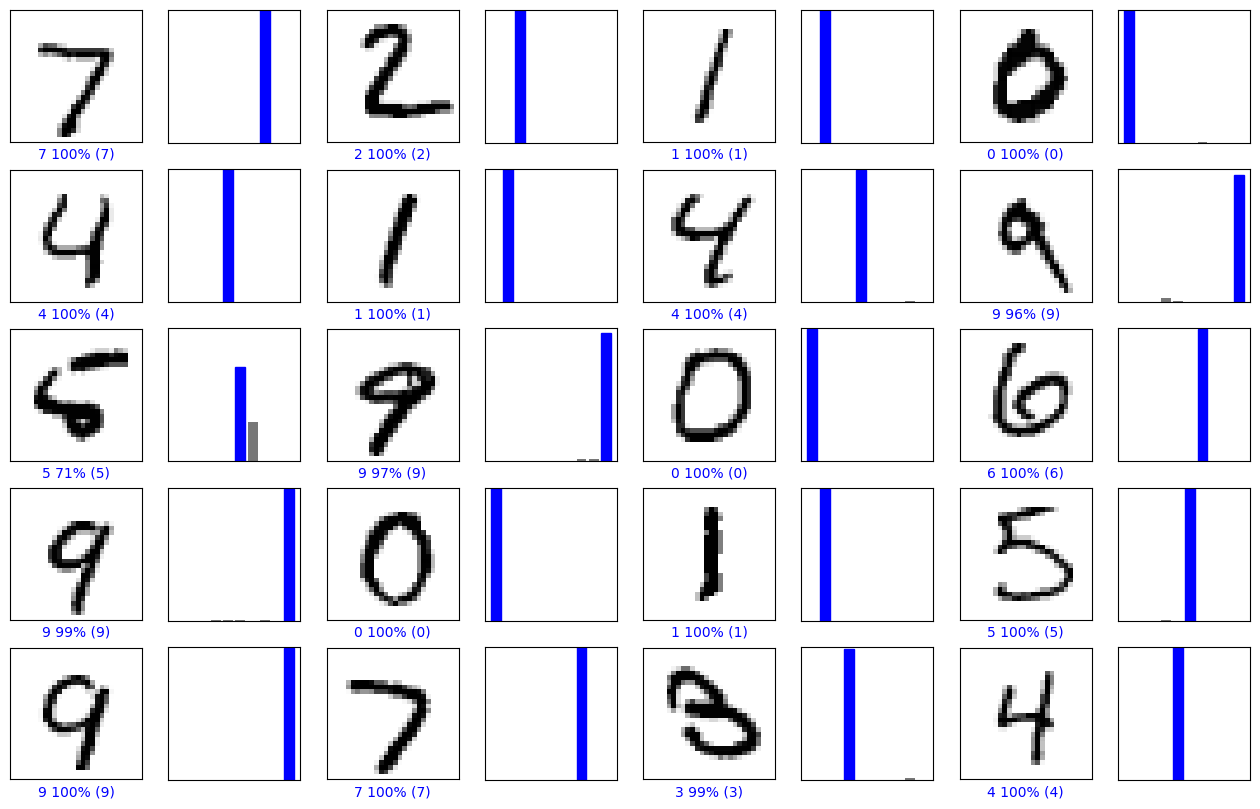

In [ ]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)
comet_model_2.log_figure(figure=plt)
comet_model_2.end()
